In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("Abandoned customers.csv")
data.head()

,customer_id,total_booking,total_day_stayed,days_since_last_booking,total_services_spent,total_services_used,total_spent,preferred_payment_method,churn
0,1,12,81,115,2195,34,4123,Bank Transfer,1
1,2,7,57,57,2100,26,3040,PayPal,0
2,3,6,45,24,2084,25,1308,Crypto,0
3,4,9,79,35,3816,46,1426,Cash,0
4,5,5,49,71,469,7,1271,Crypto,0


In [3]:
data['churn'].value_counts()

churn
0    474
1    312
Name: count, dtype: int64

In [4]:
data = pd.get_dummies(data, columns=['preferred_payment_method'], drop_first=True)

In [5]:
# Kiểm tra null và xử lý
data.isnull().sum()
data.dropna(inplace=True)

In [6]:
# Fill null bằng mean
data.fillna(data.mean(numeric_only=True), inplace=True)

In [7]:
# Tách biến độc lập và phụ thuộc
X = data.drop(columns=['customer_id', 'churn'])
y= data['churn']


In [8]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy_score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy_score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        69

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [10]:
# Kiểm tra cân bằng giữa các lớp
Counter(y_train)

Counter({0: 385, 1: 243})

In [11]:
# Tạo mô hình SM
sm = SMOTE(sampling_strategy='auto', random_state=42)

# Tạo dữ liệu mới
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Kiểm tra dữ liệu mới
Counter(y_train_sm)

Counter({1: 385, 0: 385})

In [12]:
# Train lại model sử dụng XGB

model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train_sm, y_train_sm)

# Train lại model
y_pred = model.predict(X_test)
print('Accuracy_score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy_score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        69

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [13]:
print(X_train_sm.corrwith(y_train_sm))


total_booking                          -0.217016
total_day_stayed                       -0.205291
days_since_last_booking                 0.783882
total_services_spent                   -0.097460
total_services_used                    -0.084135
total_spent                            -0.114496
preferred_payment_method_Cash          -0.095355
preferred_payment_method_Credit Card   -0.009965
preferred_payment_method_Crypto        -0.066074
preferred_payment_method_PayPal        -0.062392
dtype: float64


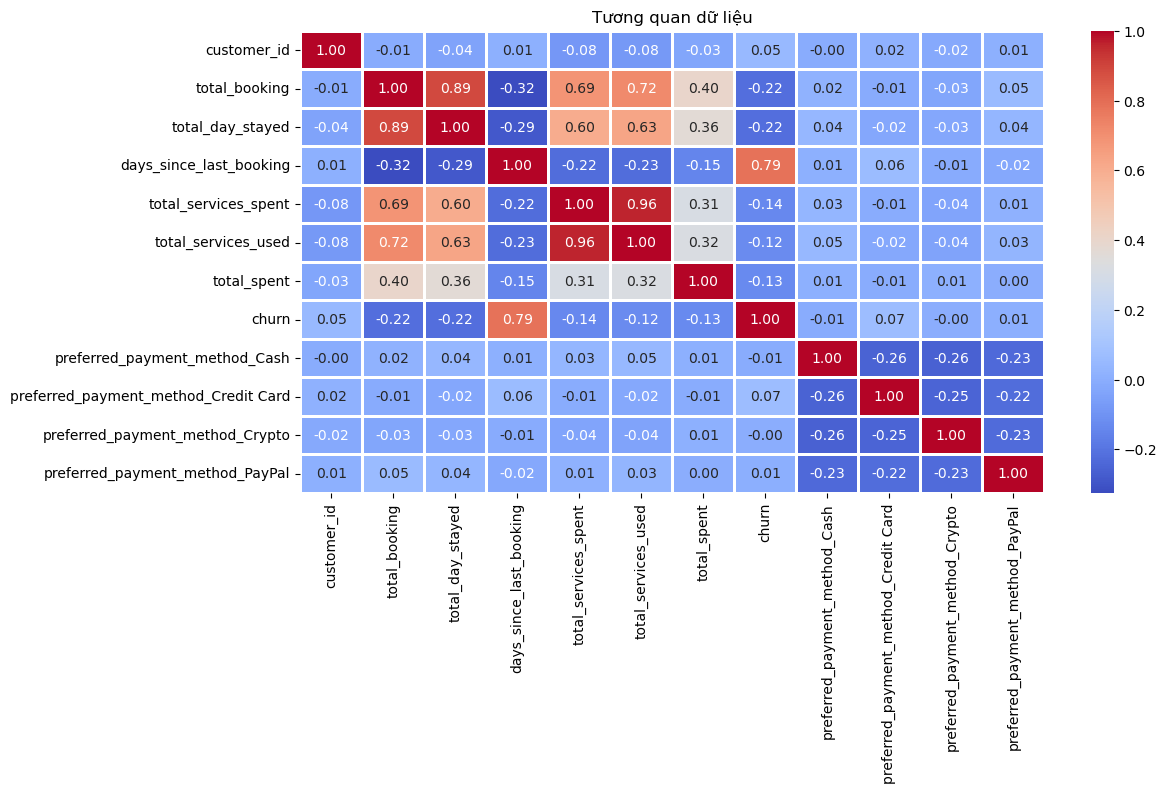

In [14]:
# Kiểm tra rò rỉ thông tin
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot= True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Tương quan dữ liệu')
plt.show()

# Tạo lại bộ dữ liệu

In [15]:
df = pd.read_csv("Abandoned customers.csv")
df.head()

,customer_id,total_booking,total_day_stayed,days_since_last_booking,total_services_spent,total_services_used,total_spent,preferred_payment_method,churn
0,1,12,81,115,2195,34,4123,Bank Transfer,1
1,2,7,57,57,2100,26,3040,PayPal,0
2,3,6,45,24,2084,25,1308,Crypto,0
3,4,9,79,35,3816,46,1426,Cash,0
4,5,5,49,71,469,7,1271,Crypto,0


In [16]:
# Loại bỏ các cột tương quan quá cao với nhau
df.drop(columns=['days_since_last_booking', 'total_day_stayed', 'total_services_used'], inplace= True)


In [17]:
df.shape

(786, 6)

In [18]:
df = pd.get_dummies(df, columns=['preferred_payment_method'], drop_first=True)

In [19]:
print('Kiểmt tra null: \n', df.isnull().sum())
df.dropna(inplace=True)

Kiểmt tra null: 
 customer_id                             0
total_booking                           0
total_services_spent                    0
total_spent                             0
churn                                   0
preferred_payment_method_Cash           0
preferred_payment_method_Credit Card    0
preferred_payment_method_Crypto         0
preferred_payment_method_PayPal         0
dtype: int64


In [20]:
X = df.drop(columns=['customer_id', 'churn'])
y= df['churn']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = RandomForestClassifier(n_estimators=200, class_weight= 'balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy_score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy_score:  0.6139240506329114
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        89
           1       0.61      0.33      0.43        69

    accuracy                           0.61       158
   macro avg       0.61      0.58      0.57       158
weighted avg       0.61      0.61      0.59       158



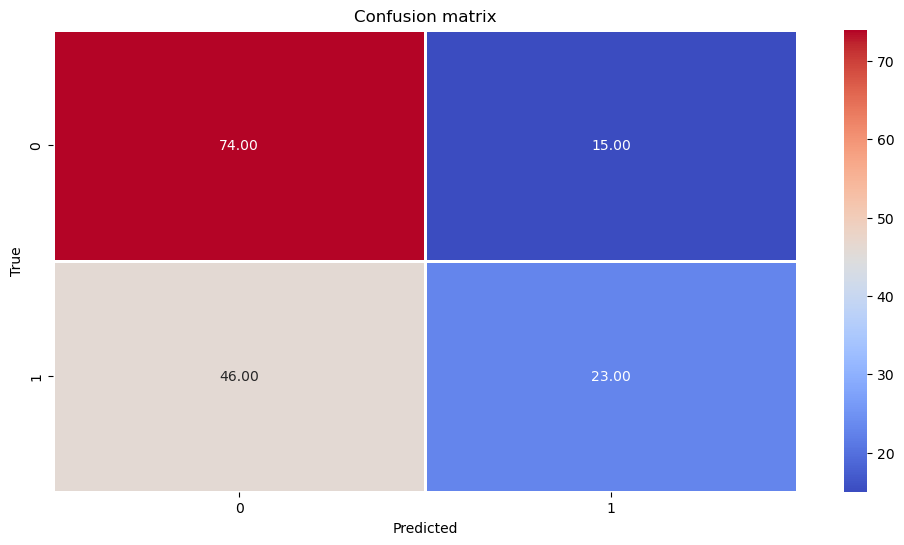

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot= True, cmap='coolwarm', fmt='.2f', linewidths=2, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

# Tìm model tối ưu

In [24]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None ,10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [25]:
y_pred_best = best_model.predict(X_test)
print('accuracy_score', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

accuracy_score 0.6012658227848101
              precision    recall  f1-score   support

           0       0.62      0.78      0.69        89
           1       0.57      0.38      0.45        69

    accuracy                           0.60       158
   macro avg       0.59      0.58      0.57       158
weighted avg       0.59      0.60      0.58       158



In [26]:
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Train lại model
y_pred = model.predict(X_test)
print('Accuracy_score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy_score:  0.6582278481012658
              precision    recall  f1-score   support

           0       0.65      0.84      0.74        89
           1       0.67      0.42      0.52        69

    accuracy                           0.66       158
   macro avg       0.66      0.63      0.63       158
weighted avg       0.66      0.66      0.64       158

